# Exercício 5

Considere os grafo dos personagens do livro “Les miserables”. Assuma que um dos vértices está infectado. Simule
a propagação de epidemias como um processo de Poisson, sendo que a doença é propagada com uma taxa β e
cada indivíduo se recupera com uma taxa µ. Faça um estudo de simulação sobre esse problema, mostrando, por
exemplo, com a taxa de infectados muda ao longo do tempo.

Inicialmente, vamos definir o grafo que representa as conexões entre cada personagem do livro.

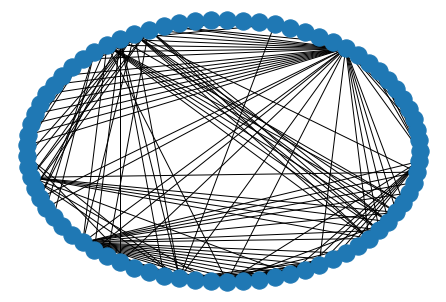

In [827]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as r
import matplotlib.animation as animation

g= nx.read_gml("lesmis.gml") # Read the network
g = g.to_undirected() #Remove a direcao dos links

cpos = nx.circular_layout(g)

nx.draw(g,pos = cpos, with_labels=False, arrows=False,)
plt.show()

Agora vamos definir uma função, que dado um dicionário com valores numéricos, retorna a chave com o maior valor.

In [709]:
def dic_menor(aDict):
    menor = 10**200
    chave_menor = None
    for chave, valor in aDict.items():
        if valor < menor:
            menor = valor
            chave_menor = chave
    return chave_menor

Com o grafo em mão é realizado o algorítimo de simulação de propagação de epidimias, a princípio usaremos Beta = 2 e mi = 1.

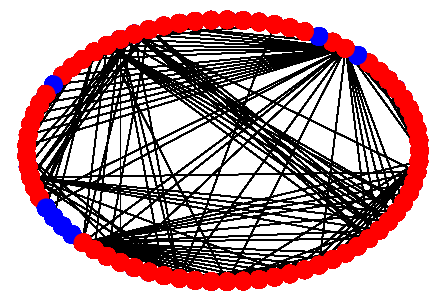

In [961]:
B = 2
mi = 1

sit = {}
for i in list(g):
    temp = {i: 0}
    sit.update(temp)
    
sit[r.choice(list(sit))] = 1

t=0
tempos = []
qtd_inf = [] 

j=0

while(1 in sit.values()):
    val = {}
    for no in sit.keys():
        if sit[no] == 1:
            temp = {no: np.random.exponential(1/mi)}
            val.update(temp)
            for viz in list(g.neighbors(no)):
                if sit[viz] == 0:
                    temp = {viz : np.random.exponential(1/B)}
                    val.update(temp)           
    sit[dic_menor(val)] += 1
    
    t += val[dic_menor(val)]
    qtd_inf_atual = 0
    for i in sit.values():
        if i == 1:
            qtd_inf_atual += 1
    tempos.append(t)
    qtd_inf.append(qtd_inf_atual)
    
    color_map = []
    for node in g:
        if sit[node] == 0:
            color_map.append('blue')
        else: 
            color_map.append('red')  
    j+=1
    nx.draw(g,pos = cpos, with_labels=False, node_color = color_map, arrows=False)
    #lt.savefig('grafo'+str(j))


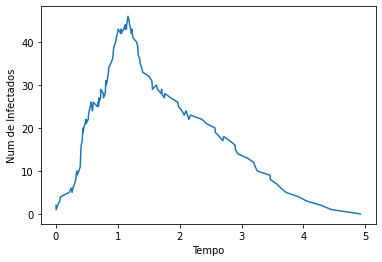

In [962]:
plt.plot(tempos,qtd_inf)
plt.xlabel('Tempo')
plt.ylabel('Num de Infectados')
plt.show()

Agora veremos como fica a curva de infetados com Beta menor que mi, usaremos, Beta = 1 e mi = 2.

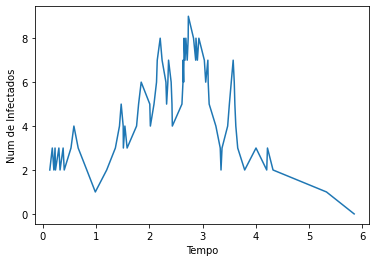

In [980]:
B = 1
mi = 2

sit = {}
for i in list(g):
    temp = {i: 0}
    sit.update(temp)
    
sit[r.choice(list(sit))] = 1

t=0
tempos = []
qtd_inf = [] 

while(1 in sit.values()):
    val = {}
    for no in sit.keys():
        if sit[no] == 1:
            temp = {no: np.random.exponential(1/mi)}
            val.update(temp)
            for viz in list(g.neighbors(no)):
                if sit[viz] == 0:
                    temp = {viz : np.random.exponential(1/B)}
                    val.update(temp)           
    sit[dic_menor(val)] += 1
    
    t += val[dic_menor(val)]
    qtd_inf_atual = 0
    for i in sit.values():
        if i == 1:
            qtd_inf_atual += 1
    tempos.append(t)
    qtd_inf.append(qtd_inf_atual)

plt.plot(tempos,qtd_inf)
plt.xlabel('Tempo')
plt.ylabel('Num de Infectados')
plt.show()

Bonus: a simulação foi alterada, para que, os individuos que já pegaram a doença poderem pegar de novo, com Beta = 2 e mi = 1.

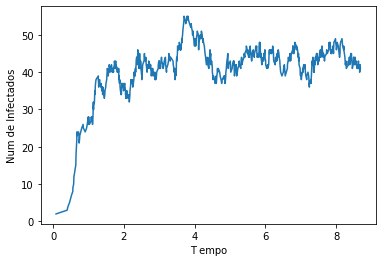

In [960]:
B = 2
mi = 1

sit = {}
for i in list(g):
    temp = {i: 0}
    sit.update(temp)
    
sit[r.choice(list(sit))] = 1

t=0
tempos = []
qtd_inf = [] 

for i in range(800):
    val = {}
    for no in sit.keys():
        if sit[no] == 1:
            temp = {no: np.random.exponential(1/mi)}
            val.update(temp)
            for viz in list(g.neighbors(no)):
                if sit[viz] == 0:
                    temp = {viz : np.random.exponential(1/B)}
                    val.update(temp)           
    
    temp = dic_menor(val)
    sit[temp] += 1
    if(sit[temp] == 2):
        sit[temp] =0
    
    t += val[dic_menor(val)]
    qtd_inf_atual = 0
    for i in sit.values():
        if i == 1:
            qtd_inf_atual += 1
    tempos.append(t)
    qtd_inf.append(qtd_inf_atual)
    
plt.plot(tempos,qtd_inf)
plt.xlabel('Tempo')
plt.ylabel('Num de Infectados')
plt.show()